<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [1]:
import numpy as np


In [2]:
import pandas as pd


## CSV 파일 데이터 읽어오기

In [3]:
df = pd.read_csv('./data/cust_data_v1.csv')

In [6]:
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG     NaN            0.0     Yes         No       1   
1     5575-GNVDE    Male            0.0      No         No      34   
2     3668-QPYBK    Male            0.0      No         No       2   
3     7795-CFOCW    Male            0.0      No         No      45   
4     9237-HQITU  Female            0.0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male            0.0     Yes        Yes      24   
7039  2234-XADUH  Female            0.0     Yes        Yes      72   
7040  4801-JZAZL  Female            0.0     Yes        Yes      11   
7041  8361-LTMKD    Male            1.0     Yes         No       4   
7042  3186-AJIEK     NaN            0.0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [4]:
# 읽어온 데이터프레임 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

In [11]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
df['tenure'].value_counts()             

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

총 7043명의 고객 데이터를 가지고 있다.  

이탈자의 경우 1869명으로 계속 통신사를 사용하는 고객이 더 많은 것으로 확인된다.  
신규가입자(1개월)가 613명으로 제일 많은 것으로 파악되며 그 다음으로 6년 장기고객이 362명으로 많다.  
신규고객이 가장 많은 것으로 보아 이탈률이 적은 것에 영향이 있을 것으로 보이며,  
현재 사용자 중 2년~4년 사용자가 가장 낮은것으로 확인된다.   

## 자료구조 파악

## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [27]:
df.shape

(7043, 21)

In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
df.groupby('Churn').describe().T

Churn                          No          Yes
SeniorCitizen  count  5173.000000  1869.000000
               mean      0.128745     0.254682
               std       0.334950     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5173.000000  1869.000000
               mean     61.266576    74.441332
               std      31.095478    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.450000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000

## Null 데이터 확인

In [35]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

In [64]:
df['DeviceProtection']

0        No
1       Yes
2       NaN
3       NaN
4       NaN
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: DeviceProtection, Length: 7043, dtype: object

## 통계 정보

# #3. 데이터 전처리 수행

## 자료구조 파악

In [37]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 컬럼 삭제

In [45]:
#불필요한 컬럼 삭제
df.drop(['customerID'], axis='columns', inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [66]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df['TotalCharges']

In [65]:
df.fillna(method='ffill')

C:\Users\LG\AppData\Local\Temp\ipykernel_12324\1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


- Churn 컬럼의 문자열값을 숫자로 변경

In [73]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [74]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

C:\Users\LG\AppData\Local\Temp\ipykernel_12324\2481122394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
C:\Users\LG\AppData\Local\Temp\ipykernel_12324\2481122394.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace(['Y

## Null 데이터 확인

- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [76]:
df.drop('DeviceProtection', axis=1, inplace=True)
df.dropna(inplace=True)

In [77]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# #4. 시각화

## 라이브러리 임포트

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Bar 차트

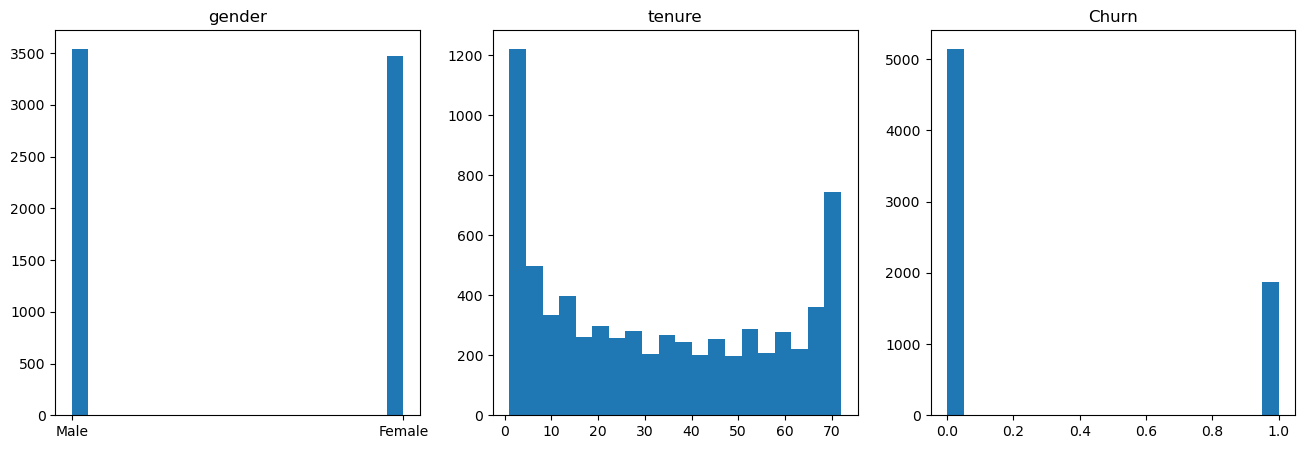

In [79]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['gender'], bins=20)
ax2.hist(df['tenure'], bins=20)
ax3.hist(df['Churn'], bins=20)

ax1.set_title('gender')
ax2.set_title('tenure')
ax3.set_title('Churn')

plt.show()

사용자의 성별은 남녀 비율이 차이가 없음.  

사용자의 사용 기간의 경우 1개월의 신규 사용자가 제일 많으며, 70개월 이상 사용자가 그 다음으로 많은 것을 확인 할 수 있다.  
1개월 사용자가 압도적으로 많다.   
2개월부터 60개월 사용자는 크게 차이는 없으나  
2개월 사용자의 비율이 1개월 사용자의 비해서 큰 폭으로 낮아지는 것으로 보아 이 기간이 이탈률이 많다는 것으로 해석됨.  

총 이탈률의 경우 이탈하지 않았다가 대부분인 것으로 보인다.  

In [ ]:
#churn : 일탈 여부 > 1[Yes], 2[No]

<Axes: xlabel='Churn', ylabel='tenure'>

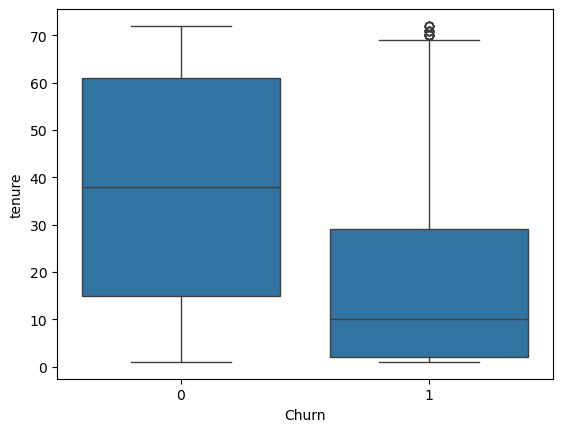

In [99]:
#사용개월수 별 이탈 여부 비교
sns.boxplot(data=df, x='Churn', y='tenure')


<Axes: xlabel='Churn', ylabel='TotalCharges'>

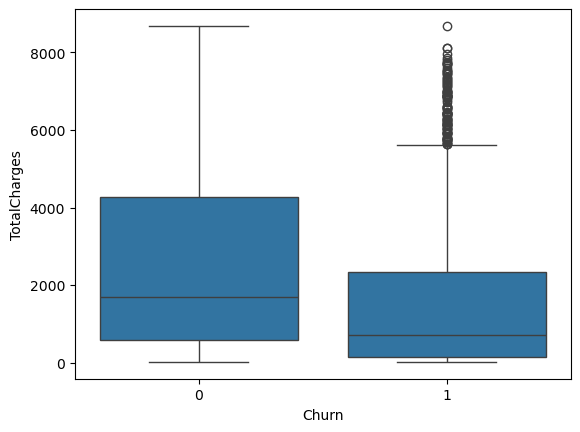

In [82]:
#총 비용 별 일탈 여부 비교
sns.boxplot(data=df, x='Churn', y='TotalCharges')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

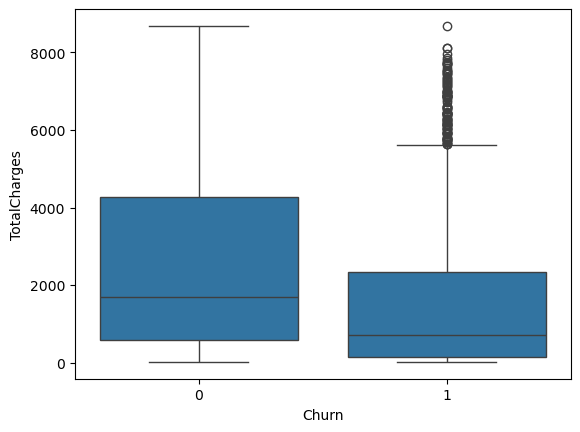

In [97]:
#성별 별 일탈 여부 비교
sns.boxplot(data=df, x='Churn', y='TotalCharges')

In [86]:
cor_matrix = df.corr(numeric_only=True)
cor_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015463,0.219949,0.102326,0.150536
tenure,0.015463,1.000000,0.246587,0.825873,-0.354249
MonthlyCharges,0.219949,0.246587,1.000000,0.650939,0.192586
TotalCharges,0.102326,0.825873,0.650939,1.000000,-0.199547
Churn,0.150536,-0.354249,0.192586,-0.199547,1.000000


<Axes: >

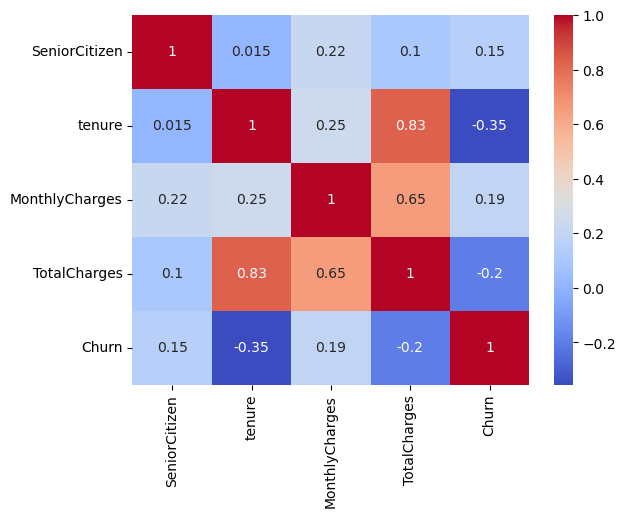

In [87]:
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

- 불균형 심한 PhoneService 컬럼 삭제

## 숫자형 컬럼에 대한 시각화

- Churn 컬럼

- SeniorCitizen 컬럼

## Histgram

In [31]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

- tenure 컬럼

- TotalCharges 컬럼

## Countplot

## heatmap

## boxplot

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()